In [101]:
from mnist import MNIST
import random 
import math

mndata = MNIST('samples')

images, labels = mndata.load_training()
test_images, test_labels = mndata.load_testing()

In [102]:
print(labels[0])

5


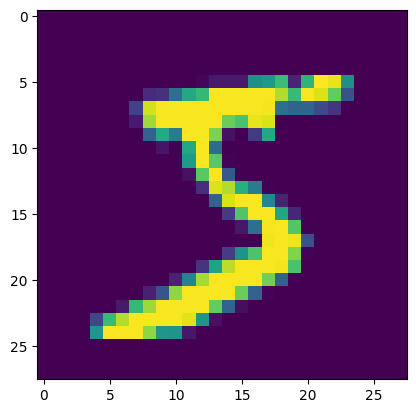

In [103]:
import matplotlib.pyplot as plt
import numpy as np
index = 0
image = np.array(images[index]).reshape(28, 28)
plt.imshow(image)
plt.show()

In [104]:
class neuron:
    def __init__(self, activation, layer, row, weights, bias):
        self.activation = activation
        self.layer = layer
        self.row = row
        self.weights = weights
        self.bias = bias


In [105]:
class input_neuron(neuron):
    def __init__(self, activation, row):
        super().__init__(activation, 0, row, [], 0)

In [106]:
class output_neuron(neuron):
    def __init__(self, activation, row, weights, bias):
        super().__init__(0, 3, row, weights, bias)

In [107]:
class hidden_neuron(neuron):
    def __init__(self, activation, layer, row, weights, bias):
        super().__init__(activation, layer, row, weights, bias)

In [108]:
net = [[],[],[],[]]
#inits the input layer neurons  
for i in range(len(images[0])):
    net[0].append(input_neuron(0, i))
#inits the hidden layers of the net and adds them to the net list
for i in range(1, 3):
    for j in range(16):
        net[i].append(hidden_neuron(0, i, j, [random.randint(0, 100)/100 for i in range(len(net[i-1]))], random.randint(-100, 100)))
#inits the output layer neurons
for i in range(10):
    net[3].append(output_neuron(0, i, [random.randint(0, 100)/100 for i in range(len(net[2]))], random.randint(-100, 100)))


In [109]:
#loads the selected image into the net 
def load_image(image, net):
    for i in range(len(net[0])):
        net[0][i].activation = image[i]

    return net
    

In [110]:
def run_net(image, net):
    
    net = load_image(image, net)

    # activates the hidden layers
    net = activate_layer(net, 1)
    net = activate_layer(net, 2)
   
    # activates the output layer 
    net = activate_layer(net, 3)
    
    # grabs the activation of each output neuron and adds it to the output list
    output = []
    for neuron in net[-1]:
        output.append(neuron.activation)

    return output

def activate_layer(net, layer):
    #goes through each neuron in the current layer
    for i in range(len(net[layer])):
        #goes through each neuron in the previous layer 
        for j in range(len(net[layer-1])):
            #multiplies the activation of the neuron in the previous layer by the weight of the connection and adds it to the current neurons activation   
            net[layer][i].activation += (net[layer-1][j].activation * net[layer][i].weights[j])
        # takes the activation of the current neuron and adds the bias 
        net[layer][i].activation += net[layer][i].bias
        
        #takes the activation of the current neuron and puts it throught the sigmoid "squishifitcaion" function to get a number between 0 and 1 
        net[layer][i].activation = 1/(1+math.exp(net[layer][i].activation * -1))

    return net

In [111]:
def correct_result(image_label):
    output = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    output[image_label+1] = 1.0

    return output

In [112]:
#calculates the error in each neuron of the output layer and returns as a list of errors 
def get_output_layer_error(output, correct_output):
    error = []

    #loops through the output and compares the given result to the correct result and adds that error to the error array 
    for i in range(len(output)):
        error.append(correct_output[i]-output[i])

    return error

In [113]:
def get_hidden_layer_error(hidden_layer_num, error_next_layer, net):
    errors = []
    for i in range(len(net[hidden_layer_num])):
        total_error=0
        max_weight = 0
        for j in range(len(error_next_layer)):
            max_weight = 0
            for weight in net[hidden_layer_num+1][j].weights:
                max_weight+=weight
            print("######")
            print(i)
            print(j)
            total_error+=(net[hidden_layer_num+1][j].weights[i]/max_weight)*error_next_layer[j]

        errors.append(total_error)
    
    return errors



In [114]:
output = run_net(images[0], net)
correct_output = correct_result(labels[0])
output_layer_error = get_output_layer_error(output, correct_output)
second_hidden_layer_error = get_hidden_layer_error(2,output_layer_error,net)

print(output)
print(correct_output)
print(output_layer_error)
print(second_hidden_layer_error)


######
0
0
######
0
1
######
0
2
######
0
3
######
0
4
######
0
5
######
0
6
######
0
7
######
0
8
######
0
9
######
1
0
######
1
1
######
1
2
######
1
3
######
1
4
######
1
5
######
1
6
######
1
7
######
1
8
######
1
9
######
2
0
######
2
1
######
2
2
######
2
3
######
2
4
######
2
5
######
2
6
######
2
7
######
2
8
######
2
9
######
3
0
######
3
1
######
3
2
######
3
3
######
3
4
######
3
5
######
3
6
######
3
7
######
3
8
######
3
9
######
4
0
######
4
1
######
4
2
######
4
3
######
4
4
######
4
5
######
4
6
######
4
7
######
4
8
######
4
9
######
5
0
######
5
1
######
5
2
######
5
3
######
5
4
######
5
5
######
5
6
######
5
7
######
5
8
######
5
9
######
6
0
######
6
1
######
6
2
######
6
3
######
6
4
######
6
5
######
6
6
######
6
7
######
6
8
######
6
9
######
7
0
######
7
1
######
7
2
######
7
3
######
7
4
######
7
5
######
7
6
######
7
7
######
7
8
######
7
9
######
8
0
######
8
1
######
8
2
######
8
3
######
8
4
######
8
5
######
8
6
######
8
7
######
8
8
######
8
9
######
9
0